# Quant basics

Bem vindo ao projetinho do Turing Quant!

Neste notebook você aprenderá os seguinte assuntos:

- Importação e visualização de dados financeiros
- Retornos e Risco de um ativo
- Análise de portfólios
- Previsão de Series Temporais

## 1. Importação de dataset de preço histórico

Para a importação de dados existem diversas bibliotecas em python que fornem preços históricos de ativos

Dentre elas podemos citar as seguinte plataformas:

- Google Finance (Via panda_datareader)
- Yahoo Finace (Via panda_datareader ou yfinance)
- Quandl

Pesquise sobre como importar dados nessas bibliotecas. Os datasets que conseguimos com essas bibliotecas são denominados OHLCV (open-high-low-close-volume).

- Plote os preços de fechamento
- Plote um gráfico de vela (Candlestick)
- Faça uma simples análise qualitativa do ativo escolhido (Ex: porque ele teve grande variação em algum momento)

In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objects as go
import numpy as np
import math
symbol = 'LMT'
data_source='yahoo'
start_date = '2010-01-01'
end_date = '2020-07-15'
df = data.DataReader(symbol, data_source, start_date, end_date)
df.reset_index(drop=False, inplace=True,col_level=1)
df.head(5)

c:\users\thali\appdata\local\programs\python\python38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Date       High        Low       Open      Close     Volume  Adj Close
0 2010-01-04  76.949997  75.519997  75.870003  76.849998  2408300.0  53.961300
1 2010-01-05  77.790001  76.550003  76.620003  77.650002  2356500.0  54.523022
2 2010-01-06  77.190002  75.849998  76.099998  76.510002  5208100.0  53.722557
3 2010-01-07  76.199997  73.610001  76.169998  74.410004  7038300.0  52.248001
4 2010-01-08  75.940002  74.320000  74.349998  75.610001  3629400.0  53.090603

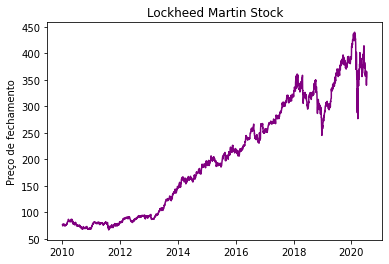

In [2]:
plt.plot(df['Date'],df['Close'],color='purple')
plt.ylabel('Preço de fechamento')
plt.title('Lockheed Martin Stock')
plt.show()

In [3]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_layout(title='Lockheed Martin Stock',yaxis_title='Value')
fig.show()

In [4]:
df_2020 = data.DataReader(symbol, data_source, '2020-01-01', end_date)
df_2020.reset_index(drop=False, inplace=True,col_level=1)
fig = go.Figure(data=[go.Candlestick(x=df_2020['Date'],open=df_2020['Open'],high=df_2020['High'],low=df_2020['Low'],close=df_2020['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_layout(title='Lockheed Martin Stock in 2020',yaxis_title='Value')
fig.show()

## Análise qualitativa

   A Lockheed Martin (LMT-NYSE) é uma empresa estado-unidense do ramo aeroespacial, criada em 1995 através da fusão entre a Lockheed Corporation e a Martin Marietta. Seu principal cliente é o Departamento de Defesa dos Estados Unidos (DoD), sendo responsável por cerca de 70% do orçamento anual da corporação. Boa parte do orçamento (28%) também é oriunda de clientes internacionais. Esses são todos alinhados geopoliticamente ao governo americano e não podem comprar da empresa sem o consentimento do Estados Unidos. Bilateralmente, as vendas da empresa correspondem a 28% do equipamento militar comprado pelo DoD, configurando, assim, como sua principal fornecedora de armamentos. 

   Administrativamente, a empresa é dividida em 4 setores: Aeronáutico, Controle de Mísseis, Sistema Rotativo e de Missões e Sistemas Espaciais (a participação dos setores no orçamento e nos lucros pode ser observada no gráfico abaixo). Isso possibilita uma estrutura amplamente interdisciplinar, cultura que tem sido cada vez mais valorizada em ambientes corporativos. Ademais, de acordo com o índice anti-corrupção da Transparency International UK, a Lockheed Martin está classificada como pertencente ao Grupo A - sendo essa a faixa classificatória preferível, evidenciando a transparência e comprometimento ético da empresa. 
  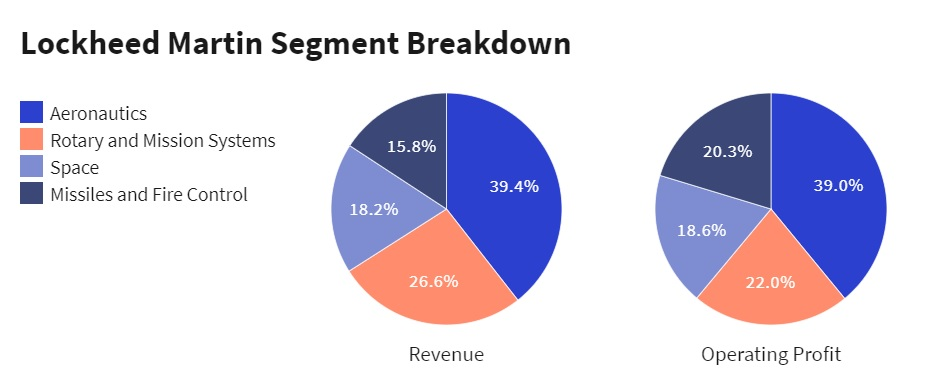
  A fim de analisar o principal cliente da empresa, cabe analisar a geopolítica estado-unidense. Sendo o país que mais direciona capitais para o setor de defesa (cerca de 13% do orçamento federal do ano fiscal de 2020 será destinado para o DoD, o que corresponde a, aproximadamente, 633 bilhões de dólares), o Estados Unidos gasta mais com defesa do que a soma do gasto pelos próximos 7 países que mais gastam. Não coincidentemente, também configura como o principal exportador de armas, representando cerca de 36% do mercado global. Tais estatíscas corroboram a geopolítica adotada, em que o país apresenta forte estrutura de defesa, mesmo em tempos de "paz". Essa postura de caráter "preventivo" possui tanto raízes históricas (Doutrina Monroe e política do Big Stick) quanto motivações contemporâneas (Doutrina Bush, de ataques preventivos como resposta ao atentado do 11 de setembro). Além disso, cabe mencionar que, como principal fornecedor global de armamentos, o Estados Unidos (e, consequentemente, a empresa analisada) alimenta diversas guerras localizadas. Notadamente, no Oriente Médio, em que a aliada estado-unidense - Arábia Saudita - configura como o principal país importador de armas do mundo.
  
  Assim, percebe-se que, mesmo em tempos de "paz", a empresa tem seu orçamento garantido devido à cultura de seu principal cliente. Em tempos de conflitos iminentes, contudo, as ações da empresa tendem a valorizarem. Tal cenário pôde ser observado em janeiro deste ano (2020), devido à escalada das tensões do EUA com o Irã ocasionada pela morte do general iraniano Qasem Soleimani em um ataque estado-unidense no Iraque. Como boa parte do orçamento desta vem de recursos públicos estado-unidenses, é razoável pensar que existe uma forte correlação entre o status da economia do país e o ativo. Uma forma quantitativa de analisar essa correlação é o cálculo do beta do ativo, feito abaixo através da regressão linear considerando o índice S&P 500 como benchmark.

In [5]:
#Simulação do Cálculo do beta
dfLM = data.DataReader('LMT', data_source, '2015-07-15', end_date)
dfSP = data.DataReader('^GSPC', data_source, '2015-07-15', end_date)
return_SP = dfSP.Close.pct_change(30)[30:]
return_LM = dfLM.Close.pct_change(30)[30:]
import statsmodels.api as sm
from statsmodels import regression
X = return_SP.values
Y = return_LM.values
def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    x = x[:,1]
    return model.params[0], model.params[1]
alpha, beta = linreg(X,Y)
print('alpha ='+str(alpha))
print('beta ='+str(beta))

alpha =0.007111807018257936
beta =0.8579181158521928


Obs.: O período de 5 anos com análise da mudança percentual mensal foi escolhido a fim de que o resultado pudesse ser comparado com o fornecido pelo Yahoo Finance.
De acordo com a fonte supracitada, o beta da ação é de 0.94. Portanto, o modelo apresenta um erro médio de apenas 8.5%
Abaixo, estão plotados gráficos para a comparação da movimentação entre o ativo analisado e a benchmark escolhida.

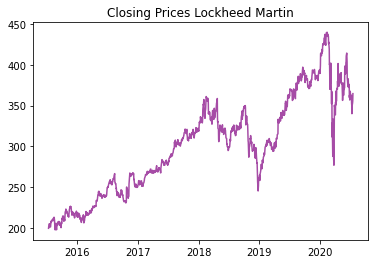

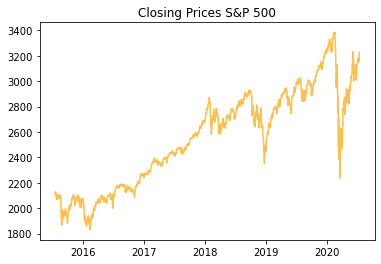

In [6]:
#Plotagem
dfLM.reset_index(drop=False, inplace=True,col_level=1)
dfSP.reset_index(drop=False, inplace=True,col_level=1)
plt.plot(dfLM['Date'],dfLM['Close'],color='purple',alpha=0.7)
plt.title('Closing Prices Lockheed Martin')
plt.show()
plt.plot(dfSP['Date'],dfSP['Close'],color='orange',alpha=0.7)
plt.title('Closing Prices S&P 500')
plt.show()

O cálculo do beta e a plotagem comparativa acima mostram que, de fato, existe um forte correlação entre o estado do ativo e o status da economia nacional. Como o beta é abaixo de 1, infere-se que a empresa tenha um bom gerenciamento do risco sistemático e, dada sua estrutura administrativa organizacional, aparenta apresentar baixos riscos idiossincráticos.

# 2. Retorno e Risco

Essencialmente, a natureza do Mercado Financeiro é baseada em um certo nível de retorno (a variação do seu investimento) para um dado nível de risco (o quão provável é esse retorno). Há uma série de maneiras para mensurar o risco, mas geralmente elas estão ligadas à volatilidade do ativo, que, em sua forma mais simples, é o desvio padrão dos preços em um dado período.

Com o mesmo ativo que você importou anteriormente, iremos iniciar os calculos de risco e retorno. Porém inicialmente iremos analisar retorno e risco com o preço de fechamento.

## Retorno

Existem algumas maneiras de se calcular o retorno de uma série temporal, aqui podemos citar duas:

- Retorno Simples: $R_t = (P_t - P_{t-1})/P_{t-1} = P_t/P_{t-1} - 1$
- Retorno Logaritmo: $r_t = log(P_t/P{t-1}) = log(P_t) - log(P_{t-1})$

Sendo $P_t$ o preço no tempo t, e $P_{t-1}$ preço no tempo $t-1$ (Dia anterior).

Manipulando o dataframe implemente esse dois tipos de retonos e compare-os

Calcule os retornos cumulativos deles

- Retorno Cumulatvo: $R_{cum} = (1+R_t) * (1+R_{t-1}) * ... * (1+R_{t-n}) $

#### Recomendação: Na medida do possível minimize a utilização de `for` loops, e tente usar numpy para realizar os cálculos de forma vetorizada, o que torna os cálculos muito mais eficientes.

In [7]:
#Retorno Simples
P = list(df['Close'])
simp_return = []
Rcum_simp = 1
i = 1
while i < len(P):
    num = (P[-i]-P[-i-1])/P[-i-1]
    Rcum_simp = (1 + num)*Rcum_simp
    simp_return.append(num)
    i += 1
simp_return.append('NaN')
simp_return.reverse()
df['simp_return'] = simp_return
df['simp_return'] = pd.to_numeric(df['simp_return'], errors='coerce')
df.head(5)

Date       High        Low       Open      Close     Volume  \
0 2010-01-04  76.949997  75.519997  75.870003  76.849998  2408300.0   
1 2010-01-05  77.790001  76.550003  76.620003  77.650002  2356500.0   
2 2010-01-06  77.190002  75.849998  76.099998  76.510002  5208100.0   
3 2010-01-07  76.199997  73.610001  76.169998  74.410004  7038300.0   
4 2010-01-08  75.940002  74.320000  74.349998  75.610001  3629400.0   

   Adj Close  simp_return  
0  53.961300          NaN  
1  54.523022     0.010410  
2  53.722557    -0.014681  
3  52.248001    -0.027447  
4  53.090603     0.016127

In [8]:
#Retorno Simples Cumulativo
print("Retorno simples cumulativo =",Rcum_simp)

Retorno simples cumulativo = 4.743786659688194


In [9]:
#Retorno Logaritmico
log_return = []
c = 1
Rcum_log = 1
while c < len(P):
    num = math.log(P[-c]) - math.log(P[-c-1])
    Rcum_log = (1+num)*Rcum_log
    log_return.append(num)
    c += 1
log_return.append('NaN')
log_return.reverse()
df['log_return'] = log_return
df['log_return'] = pd.to_numeric(df['log_return'], errors='coerce')
df.head(5)

Date       High        Low       Open      Close     Volume  \
0 2010-01-04  76.949997  75.519997  75.870003  76.849998  2408300.0   
1 2010-01-05  77.790001  76.550003  76.620003  77.650002  2356500.0   
2 2010-01-06  77.190002  75.849998  76.099998  76.510002  5208100.0   
3 2010-01-07  76.199997  73.610001  76.169998  74.410004  7038300.0   
4 2010-01-08  75.940002  74.320000  74.349998  75.610001  3629400.0   

   Adj Close  simp_return  log_return  
0  53.961300          NaN         NaN  
1  54.523022     0.010410    0.010356  
2  53.722557    -0.014681   -0.014790  
3  52.248001    -0.027447   -0.027831  
4  53.090603     0.016127    0.015998

In [10]:
#Retorno Logarítmico Cumulativo
print("Retorno logaritmico cumulativo =",Rcum_log)

Retorno logaritmico cumulativo = 3.756115023324074


# Risco

Há diversos tipo de definições de risco, em finança quantitativas uma maneira bem fácil de calcular o risco é a partir da variação do ativo. Basicamente, você não quer investir num ativo que varia muito, ou seja, muito imprevisível. Uma maneira estátistica de cálcular essa volatilidade é a partir do desvio padrão.

- Calcule o desvio padrão do ativo

Apenas o valor do desvio padrão não apresenta muita informação, então iremos calcular o rolling std. Básicamente iremos calcular o desvio padrão a cada t intervalo de tempo.

- Calcule o rolling std

Dica: utilize o método ```pandas.rolling(window).std()``` do pandas, window é o intervalo em que você irá calcular o desvio padrão

- Calcule o desvio padrão exponencial móvel (EWMA)

### Desafio

- Calcule o desvio padrão estimado pelo High e Low ([Parkinson Number](https://www.ivolatility.com/help/3.html))
<img src="https://miro.medium.com/proxy/0*t4hSod9UQhA3Lsmz.png">

- Calcule o desvio padrão estimado por High, Low, Close e Open ([Garman-Klass](https://portfolioslab.com/garman-klass))

<img src="https://miro.medium.com/max/1400/0*S6HDttTDL2p0GCC2.png">

Temos uma breve explicação desses estimadores de volatilidade em nosso Turing Talks: [Construindo uma Estratégia de Investimentos Quantitativa — Time Series Momentum](https://medium.com/turing-talks/construindo-uma-estrat%C3%A9gia-de-investimentos-quantitativa-time-series-momentum-7e60a40636bd)

In [11]:
#Desvio Padrão considerando Retorno Simples
soma = 0
simp_return = simp_return[1:]
for i in range(len(simp_return)):
    soma += simp_return[i]
Rmed_simp = soma/len(simp_return)
soma_sds = 0
for c in range(len(simp_return)):
    dif = (simp_return[c] - Rmed_simp)**2
    soma_sds += dif
sd_simp = math.sqrt(soma_sds/(len(simp_return)-1))
print("O desvio padrão do ativo considerando o Retorno Simples é",sd_simp)

O desvio padrão do ativo considerando o Retorno Simples é 0.01319168443289531


In [12]:
#Desvio Padrão considerando Retorno Logaritmico
soma = 0
log_return = log_return[1:]
for i in range(len(log_return)):
    soma += log_return[i]
Rmed_log = soma/len(log_return)
soma_sd_log = 0
for c in range(len(log_return)):
    dif = (log_return[c] - Rmed_log)**2
    soma_sd_log += dif
sd_log = math.sqrt(soma_sd_log/(len(log_return)-1))*math.sqrt(252)
print("O desvio padrão do ativo considerando o Retorno Logaritmico é",sd_log)

O desvio padrão do ativo considerando o Retorno Logaritmico é 0.20994729436017825


In [13]:
#Rolling Standard Deviaton
df.rolling(2).std()

High       Low      Open     Close        Volume  Adj Close  \
0          NaN       NaN       NaN       NaN           NaN        NaN   
1     0.593973  0.728325  0.530330  0.565688  3.662813e+04   0.397197   
2     0.424263  0.494978  0.367699  0.806101  2.016386e+06   0.566014   
3     0.700040  1.583918  0.049497  1.484923  1.294147e+06   1.042669   
4     0.183844  0.502045  1.286934  0.848526  2.410456e+06   0.595809   
...        ...       ...       ...       ...           ...        ...   
2646  5.522502  6.682168  3.889087  7.262000  9.991419e+04   7.262000   
2647  0.113140  1.753633  4.009305  6.569028  2.189203e+05   6.569028   
2648  5.437653  4.907323  7.969107  2.694075  3.656449e+05   2.694075   
2649  0.777800  0.282838  3.160768  1.838482  2.682763e+05   1.838482   
2650  6.830633  8.174153  8.845913  6.293246  2.446589e+04   6.293246   

      simp_return  log_return  
0             NaN         NaN  
1             NaN         NaN  
2        0.017742    0.017781  
3        0.009027    0.009221  
4        0.030812    0.030992  
...           ...         ...  
2646     0.014650    0.014934  
2647     0.040058    0.040109  
2648     0.011609    0.011392  
2649     0.002507    0.002484  
2650     0.012487    0.012289  

[2651 rows x 8 columns]

In [14]:
#Exponentially Weighted Moving Average
ewma = df['log_return'].ewm(span=2).std()
print(ewma)

0            NaN
1            NaN
2       0.017781
3       0.015857
4       0.026891
          ...   
2646    0.014080
2647    0.034704
2648    0.020043
2649    0.011774
2650    0.012813
Name: log_return, Length: 2651, dtype: float64


In [15]:
#Parkinson Number
highs = list(df['High'])
lows = list(df['Low'])
soma = 0
for i in range(len(highs)):
    num = (math.log(highs[i]) -  math.log(lows[i]))**2
    const = 1/(4*math.log(2))
    num2 = num * const
    soma += num2
div = soma/len(highs)
pnumber = math.sqrt(div)
print("O número de Parkinson do ativo no período analisado é",pnumber)

O número de Parkinson do ativo no período analisado é 0.011426076873512724


In [16]:
#Garman Klass
soma = 0
const = 1/(2*len(highs))
opens = list(df['Open'])
closes = list(df['Adj Close'])
const2 = (-2*(math.log(2)-1))/len(highs)
for t in range(len(highs)):
    num1 = 2*(math.log(highs[t]) - math.log(lows[t]))
    num2 = const2*(2*(math.log(closes[t])-math.log(opens[t])))
    numd = num1 + num2
    soma += numd
num3 = soma * const
gk = math.sqrt(num3)
print("O número de Garman-Klass do ativo no período analisado é",gk)

O número de Garman-Klass do ativo no período analisado é 0.12624357486135498


# 3. Lidando com portfolios
 
Notebook de auxilio (crie uma conta no quantopian): https://www.quantopian.com/lectures/introduction-to-numpy

Agora que você já aprendeu como importar preços históricos e como calcular o risco e retorno de ativos, podemos usar esse conhecimento para começar a montar o nosso portfolio!

Nessa etapa, você irá montar uma carteira com 4 ações diferentes. 
 - Use o que você aprendeu nas etapas anteriores para construir um dataframe com 4 ativos diferentes junto com os seus respectivos **dados históricos de fechamento**.
 
Em seguida, você precisa distribuir a porcentagem que cada ativo da sua carteira receberá dos seus investimentos. Em finanças, chamamos isso de [pesos de um portfolio](https://www.investopedia.com/terms/p/portfolio-weight.asp)
 - Atribua pesos ($w$) para cada um dos ativos que estão na sua carteira (Ele devem somar 1) . Ex: w = [0.3, 0.3, 0.2, 0.2]

## Retorno

Agora, você pode calcular o **retorno** do seu portfolio. 

O retorno para um período é dado pela seguinte fórmula: $R = \vec{r} \times \vec{w}$

Onde $\vec{r}$ é o vetor de retornos de cada ativo da carteira, e $\vec{w}$ os seus respectivos pesos.

- Calcule o retorno para cada dia da série temporal

- Faça um gráfico para visualizar os **retornos cumulativos** do seu portfolio e compare com algum benchmark (EX: IBOV). 

In [17]:
#Criando o Portfolio
stocks = ['LMT', 'TSLA', 'AAPL', 'BLK']
numAssets = len(stocks)
source = 'yahoo'
start = '2015-01-01'
end = '2020-07-15'

port = pd.DataFrame(columns=stocks)
for symbol in stocks:
  port[symbol] = data.DataReader(symbol, data_source=source, start=start, end=end)['Adj Close']
port.reset_index(drop=False, inplace=True,col_level=1)
w = [0.2,0.3,0.4,0.1]
port.head(5)

Date         LMT        TSLA        AAPL         BLK
0 2015-01-02  166.958115  219.309998   99.766006  309.171936
1 2015-01-05  163.486130  210.089996   96.955429  301.172485
2 2015-01-06  162.717407  211.279999   96.964584  296.492371
3 2015-01-07  164.816193  210.949997   98.324242  302.767181
4 2015-01-08  168.529999  210.619995  102.102089  306.303314

In [18]:
#Série Temporal de Retorno por Ação
#Retorno Logaritmico
Rcum_log_list = []
for stock in stocks:
    P = list(port[stock])
    log_return = []
    c = 1
    Rcum_log = 1
    while c < len(P):
        num = math.log(P[-c]) - math.log(P[-c-1])
        Rcum_log = (1+num)*Rcum_log
        log_return.append(num)
        c += 1
    Rcum_log_list.append(Rcum_log)
    log_return.append('NaN')
    log_return.reverse()
    column_name = 'log_return_'+stock
    port[column_name] = log_return
    port[column_name] = pd.to_numeric(port[column_name], errors='coerce')
port.head(5)

Date         LMT        TSLA        AAPL         BLK  log_return_LMT  \
0 2015-01-02  166.958115  219.309998   99.766006  309.171936             NaN   
1 2015-01-05  163.486130  210.089996   96.955429  301.172485       -0.021015   
2 2015-01-06  162.717407  211.279999   96.964584  296.492371       -0.004713   
3 2015-01-07  164.816193  210.949997   98.324242  302.767181        0.012816   
4 2015-01-08  168.529999  210.619995  102.102089  306.303314        0.022283   

   log_return_TSLA  log_return_AAPL  log_return_BLK  
0              NaN              NaN             NaN  
1        -0.042950        -0.028576       -0.026214  
2         0.005648         0.000094       -0.015662  
3        -0.001563         0.013925        0.020943  
4        -0.001566         0.037703        0.011612

In [19]:
#Retorno Logaritmico do Portfolio
port['ret_log_port'] = port['log_return_LMT']*w[0] + port['log_return_TSLA']*w[1] + port['log_return_AAPL']*w[2] + port['log_return_BLK']*w[3]
port.head(5)

Date         LMT        TSLA        AAPL         BLK  log_return_LMT  \
0 2015-01-02  166.958115  219.309998   99.766006  309.171936             NaN   
1 2015-01-05  163.486130  210.089996   96.955429  301.172485       -0.021015   
2 2015-01-06  162.717407  211.279999   96.964584  296.492371       -0.004713   
3 2015-01-07  164.816193  210.949997   98.324242  302.767181        0.012816   
4 2015-01-08  168.529999  210.619995  102.102089  306.303314        0.022283   

   log_return_TSLA  log_return_AAPL  log_return_BLK  ret_log_port  
0              NaN              NaN             NaN           NaN  
1        -0.042950        -0.028576       -0.026214     -0.031140  
2         0.005648         0.000094       -0.015662     -0.000777  
3        -0.001563         0.013925        0.020943      0.009758  
4        -0.001566         0.037703        0.011612      0.020229

In [20]:
#Preparação do Dataset com a benchmark
bench = data.DataReader('^GSPC', data_source=source, start=start, end=end)
bench.reset_index(drop=False, inplace=True,col_level=1)
bench.head(5)

Date         High          Low         Open        Close      Volume  \
0 2015-01-02  2072.360107  2046.040039  2058.899902  2058.199951  2708700000   
1 2015-01-05  2054.439941  2017.339966  2054.439941  2020.579956  3799120000   
2 2015-01-06  2030.250000  1992.439941  2022.150024  2002.609985  4460110000   
3 2015-01-07  2029.609985  2005.550049  2005.550049  2025.900024  3805480000   
4 2015-01-08  2064.080078  2030.609985  2030.609985  2062.139893  3934010000   

     Adj Close  
0  2058.199951  
1  2020.579956  
2  2002.609985  
3  2025.900024  
4  2062.139893

In [21]:
#Retorno Logaritmico da Benchmark
P = list(bench['Adj Close'])
log_return = []
c = 1
while c < len(P):
    num = math.log(P[-c]) - math.log(P[-c-1])
    log_return.append(num)
    c += 1
log_return.append('NaN')
log_return.reverse()
bench['log_return'] = log_return
bench['log_return'] = pd.to_numeric(bench['log_return'], errors='coerce')
bench.head(5)

Date         High          Low         Open        Close      Volume  \
0 2015-01-02  2072.360107  2046.040039  2058.899902  2058.199951  2708700000   
1 2015-01-05  2054.439941  2017.339966  2054.439941  2020.579956  3799120000   
2 2015-01-06  2030.250000  1992.439941  2022.150024  2002.609985  4460110000   
3 2015-01-07  2029.609985  2005.550049  2005.550049  2025.900024  3805480000   
4 2015-01-08  2064.080078  2030.609985  2030.609985  2062.139893  3934010000   

     Adj Close  log_return  
0  2058.199951         NaN  
1  2020.579956   -0.018447  
2  2002.609985   -0.008933  
3  2025.900024    0.011563  
4  2062.139893    0.017730

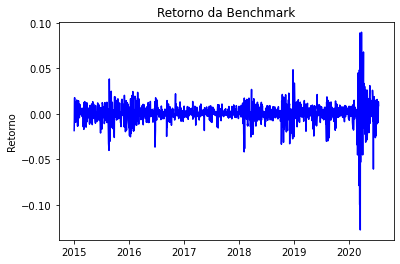

In [22]:
plt.plot(bench['Date'],bench['log_return'],color='blue')
plt.ylabel('Retorno')
plt.title('Retorno da Benchmark')
plt.show()

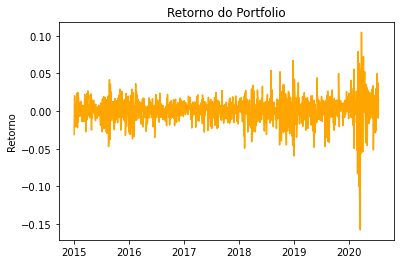

In [24]:
plt.plot(port['Date'],port['ret_log_port'],color='orange')
plt.ylabel('Retorno')
plt.title('Retorno do Portfolio')
plt.show()

## Risco

Para calcular um **risco** de um portfolio precisamos levar em conta as correlações entre todos os ativos. Para isso calcularemos a matriz de covariaças $C$ (```pandas.cov()``` ou ```np.cov()```).

A equação do risco de uma portfólio é dada pela seguinte fórmula: $\sigma = \sqrt{\vec{w}C\vec{w}^\mathsf{T}}$, sendo $T$ a tranposição de um array 

- Calcule o risco de 3 portfólios (varie o vetor de pesos).

In [23]:
port.cov()
C = np.array([[0.000218,0.000092,0.000123,0.000145],
             [0.000092,0.001094,0.000219,0.000203],
             [0.000123,0.000219,0.000323,0.000186],
             [0.000145,0.000203,0.000186,0.000321]])
weights = [[0.2,0.3,0.4,0.1],[0.25,0.25,0.25,0.25],[0.1,0.2,0.3,0.4]]
for weight in weights:
    Mw = np.array(weight)
    Mwt = np.transpose(Mw)
    mult = np.matmul(Mw,C)
    mult2 = np.matmul(mult,Mwt)
    port_risk = math.sqrt(mult2)*math.sqrt(252)
    print('O risco do portfolio para os pesos',Mw,'é',port_risk)

O risco do portfolio para os pesos [0.2 0.3 0.4 0.1] é 0.2647808905491482
O risco do portfolio para os pesos [0.25 0.25 0.25 0.25] é 0.24758634857358353
O risco do portfolio para os pesos [0.1 0.2 0.3 0.4] é 0.2522149083618968


## Teoria Moderna de Portifolio - Markowitz 

https://campus.datacamp.com/courses/introduction-to-portfolio-analysis-in-r/optimizing-the-portfolio?ex=7

Markowitz também conhecido como efficient frontier, é uma maneira de otimizar uma carteira de investimentos. Para isso simula-se diversas pesos, e para cada peso é calculado seu retorno esperado e risco. Pesquise sobre [sharpe ratio](https://www.investopedia.com/terms/s/sharperatio.asp) para realizar o degrade de cores.

<img src="https://www.pythonforfinance.net/wp-content/uploads/2017/01/efffront-1.png">

In [24]:
#Montando o Portfolio
stocks = ['LMT', 'TSLA', 'AAPL', 'BLK']
numAssets = len(stocks)
source = 'yahoo'
start = '2015-01-01'
end = '2020-07-15'
df_port = pd.DataFrame(columns=stocks)
for symbol in stocks:
  df_port[symbol] = data.DataReader(symbol, data_source=source, start=start, end=end)['Adj Close']

#Geração de Portfolios com pesos randomizados
log_ret = np.log(df_port/df_port.shift(1))
num_ports = 6000
ws = np.zeros((num_ports, 4))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    w2 = np.array(np.random.random(4))
    w2 = w2/np.sum(w2)
    ws[x,:] = w2
    ret_arr[x] = np.sum( (log_ret.mean() * w2 * 252))
    vol_arr[x] = np.sqrt(np.dot(w2.T, np.dot(log_ret.cov()*252, w2)))
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]


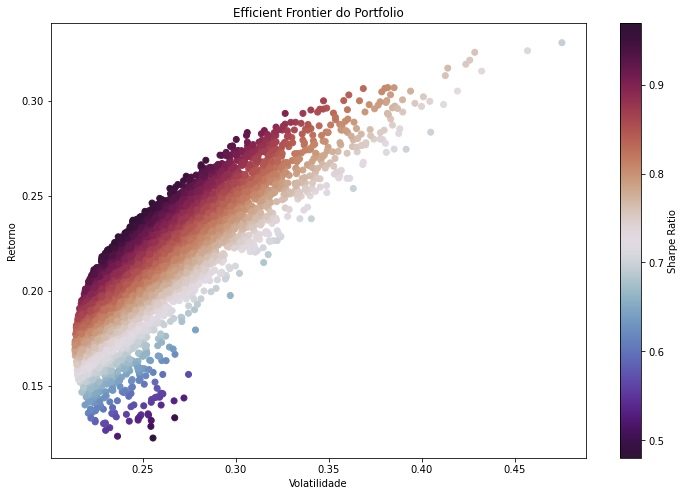

In [25]:
#Plotagem da Efficient Frontier do Portfolio
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='twilight_shifted')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier do Portfolio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.show()

In [26]:
#Peso do Portfolio com maior Sharpe Ratio
print(ws[sharpe_arr.argmax()])

[0.29848556 0.20766053 0.49084014 0.00301378]


## Deep Markowitz

Nesta etapa você deverá construir um modelo de machine learning para predizer o portfólio com maior sharpe ratio. Para isso iremos fornecer um dataset com os retornos anuais de 4 ativos e o respectivo peso do portfólio mais otimizado (maior sharpe ratio).

- feature.csv: Input do modelo, cada linha contém os retornos dos 4 ativos em apenas uma linha (shape = (30000,1004 )), se quiser converter para o formato de matriz utilize o método ```np.reshape(251, 4)```

- target.csv: Output do modelo, vetor com 4 valores, que são os pesos de cada ativo da carteira de investimentos. 

Link com o dataset: https://drive.google.com/drive/u/1/folders/1b7Ek1L6NOm3ZSlh6MakWbKQjRZlt3YNi

<img src="./images/markowitz_NN.png">

Sendo o Real: a saída do input, Markowitz: segunda interação com (5000 carteiras), e ML: a predição do modelo


In [27]:
#Explorando o Dataset
features = pd.read_csv('features2.csv')
features = features.dropna()
features.head()

Unnamed: 0         0         1         2         3         4         5  \
0           0 -0.014238 -0.012258 -0.043470 -0.006589  0.044380  0.032168   
1           0 -0.011433 -0.021818 -0.051089 -0.023122  0.048574  0.058949   
2           0 -0.003129 -0.025017 -0.055267  0.013356  0.028978  0.068190   
3           0 -0.028094 -0.025017 -0.015930 -0.008237  0.031363  0.068190   
5           0 -0.011938 -0.007011 -0.005142 -0.002331  0.036412  0.020410   

          6         7         8  ...       994       995       996       997  \
0  0.054005  0.019325  0.005532  ... -0.010289  0.005633 -0.003495  0.013446   
1  0.041172  0.048039  0.037132  ... -0.005385 -0.006594  0.000258 -0.003202   
2  0.032347  0.044643 -0.018402  ... -0.011293 -0.023900  0.003450 -0.008954   
3  0.005467  0.028239 -0.064450  ...  0.002264 -0.003953 -0.003705 -0.008954   
5  0.006246  0.009207  0.015171  ...  0.000586  0.003302 -0.011006 -0.012848   

        998       999      1000      1001      1002      1003  
0 -0.022558 -0.006358  0.002631  0.012531  0.017660  0.003555  
1  0.001477  0.000128  0.000000 -0.000612  0.004096  0.011615  
2 -0.008933 -0.007773  0.006289  0.029006  0.001034  0.017235  
3 -0.002071 -0.005291  0.004605  0.029006  0.001981  0.002660  
5 -0.001589 -0.001699 -0.002940  0.003455 -0.004690  0.005105  

[5 rows x 1005 columns]

In [28]:
#Preparação do Dataset
features = features.drop('Unnamed: 0',1)
features.shape
features_arr0 = np.array(features.iloc[0])
features_arr1 = np.array(features.iloc[1])
features_arr2 = np.array(features.iloc[2])
features_arr3 = np.array(features.iloc[3])
features_arr4 = np.array(features.iloc[4])
features_arrs = np.concatenate((features_arr0,features_arr1,features_arr2,features_arr3,features_arr4))
features_arrs.shape
features_adj = pd.DataFrame(features_arrs.reshape(1255,4))
features_adj.tail()

0         1         2         3
1250 -0.006699  0.002562  0.004033  0.000960
1251  0.008747  0.000000  0.000084  0.000426
1252  0.006164  0.006948  0.000586  0.003302
1253 -0.011006 -0.012848 -0.001589 -0.001699
1254 -0.002940  0.003455 -0.004690  0.005105

In [29]:
#Preparação para o Modelo
target = pd.read_csv('target2.csv')
target = target.drop('Unnamed: 0',1)
train_feature = features_adj[:1000].dropna()
train_target = target[:1000].dropna()
test_feature = features_adj[1000:1255].dropna()
test_target = target[1000:1255].dropna()

In [30]:
#Montando o Modelo
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(max_depth=22)
random_forest.fit(train_feature,train_target)
print(random_forest.score(train_feature, train_target))

0.820833173007329


c:\users\thali\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:426: FutureWarning:

The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').



In [31]:
# Cálculo do Portfolio com melhor Sharpe Ratio
#1. Utilizando as predições do Modelo
test_predictions = random_forest.predict(test_feature)
ws = np.zeros((255, 4))
ret_arr = np.zeros(255)
vol_arr = np.zeros(255)
sharpe_arr = np.zeros(len(list(test_predictions)))
c = 0
features_arrs_pd = pd.DataFrame(features_arrs.reshape(1255,4))
features_arrays = features_arrs.reshape(1255,4)
for w2 in list(test_predictions):
    ws[c,:] = w2
    ret_arr[c] = np.sum(features_arrs_pd.iloc[c] * w2 * 252)
    vol_arr[c] = np.sqrt(np.dot(w2.T, np.dot(features_arrs_pd.cov()*252, w2)))
    sharpe_arr[c] = ret_arr[c]/vol_arr[c]
    c += 1
ret_ML = ret_arr[sharpe_arr.argmax()]
vol_ML = vol_arr[sharpe_arr.argmax()]
print('Pesos do Portfolio com Maior Sharpe Ratio:',ws[sharpe_arr.argmax()])
print('Retorno do Portfolio:',ret_ML)
print('Volatilidade do Portfolio:',vol_ML)
print('Sharpe Ratio:',sharpe_arr[sharpe_arr.argmax()])

Pesos do Portfolio com Maior Sharpe Ratio: [0.21770422 0.25583948 0.22538216 0.30107415]
Retorno do Portfolio: 12.448500555930103
Volatilidade do Portfolio: 0.17568394736130374
Sharpe Ratio: 70.85735915489805


In [32]:
#2. Utilizando o dataset Target
weights = target[:1255].dropna()
ws = np.zeros((1255, 4))
ret_arr = np.zeros(1255)
vol_arr = np.zeros(1255)
sharpe_arr = np.zeros(1255)
c = 0
features_arrs_pd = pd.DataFrame(features_arrs.reshape(1255,4))
features_arrays = features_arrs.reshape(1255,4)
for c in range(1255):
    ws[c,:] = weights.iloc[c]
    ret_arr[c] = np.dot(features_arrs_pd.iloc[c], weights.iloc[c].T * 252)
    vol_arr[c] = np.sqrt(np.dot(weights.iloc[c].T, np.dot(features_arrs_pd.cov()*252, weights.iloc[c])))
    sharpe_arr[c] = ret_arr[c]/vol_arr[c]
ret_real = ret_arr[sharpe_arr.argmax()]
vol_real = vol_arr[sharpe_arr.argmax()]
print('Pesos do Portfolio com Maior Sharpe Ratio:',ws[sharpe_arr.argmax()])
print('Retorno do Portfolio:',ret_real)
print('Volatilidade do Portfolio:',vol_real)
print('Sharpe Ratio:',sharpe_arr[sharpe_arr.argmax()])

Pesos do Portfolio com Maior Sharpe Ratio: [2.46197757e-01 2.53308369e-01 4.82990415e-04 5.00010883e-01]
Retorno do Portfolio: 16.195509755812132
Volatilidade do Portfolio: 0.19214645020472143
Sharpe Ratio: 84.2873221886572


In [39]:
#3. Por randomização com Markovitz
num_ports = 5000
ws = np.zeros((num_ports, 4))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
c = 0
for x in range(5000):
    w2 = np.array(np.random.random(4))
    w2 = w2/np.sum(w2)
    ws[x,:] = w2
    y = x - c*1254
    ret_arr[x] = np.dot(features_arrs_pd.iloc[y], w2 * 252)
    vol_arr[x] = np.sqrt(np.dot(w2.T, np.dot(log_ret.cov()*252, w2)))
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
    if x==1254 and c<4:
        c += 1
    if x==2508:
        c += 1
    if x==3762:
        c += 1
print('Pesos do Portfolio com Maior Sharpe Ratio:',ws[sharpe_arr.argmax()])
ret_mark = ret_arr[sharpe_arr.argmax()]
vol_mark = vol_arr[sharpe_arr.argmax()]
print('Retorno do Portfolio:',ret_mark)
print('Volatilidade do Portfolio:',vol_mark)
print('Sharpe Ratio:',sharpe_arr[sharpe_arr.argmax()])

Pesos do Portfolio com Maior Sharpe Ratio: [0.22208497 0.06743201 0.06015518 0.65032784]
Retorno do Portfolio: 19.869237263425102
Volatilidade do Portfolio: 0.2431962096545089
Sharpe Ratio: 81.70043970525641


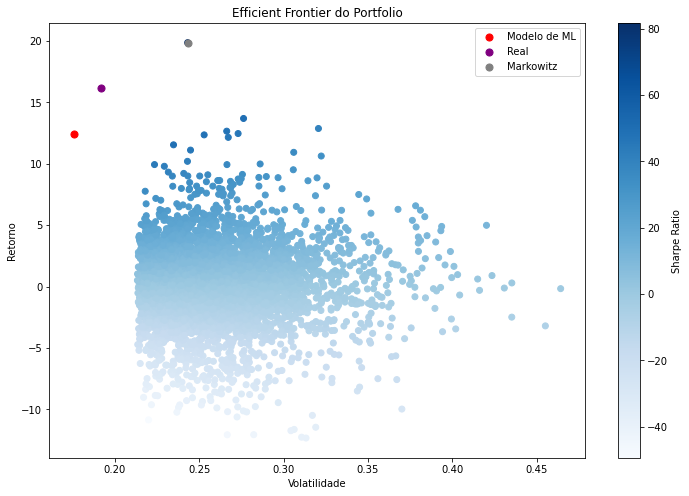

In [40]:
#Plotagem dos Resultados
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='Blues')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier do Portfolio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(vol_ML,ret_ML,c='red',s=50,label='Modelo de ML')
plt.scatter(vol_real,ret_real,c='purple',s=50,label='Real')
plt.scatter(vol_mark,ret_mark,c='grey',s=50,label='Markowitz')
plt.legend()
plt.show()

Análise: os pontos destacados (previsto pelo modelo, o real obtido com o target dataset e o obtido por Markowitz) estão relativamente próximos entre si. Contudo, os demais pontos previstos por Markowitz estão distantes dos três pontos analisados. 

# 4. Previsão de Time Series

## Cross validation em Séries Temporais

Sempre que lidamos com algoritmos de machine learning, para treiná-lo temos que separar os datasets em treino e em teste. Em séries temporais não podemos separar os dados aleatoriamente, pois a ordem no tempo importa! Portanto, seguimos a seguinte separação:

<img src="https://habrastorage.org/files/f5c/7cd/b39/f5c7cdb39ccd4ba68378ca232d20d864.png"/>

# _Feature Engineering_ em Série Temporal

Para inserir machine learning em séries temporais, precisamos efetuar o processo conhecido como feature engineering, que é básicamente escolher as entradas de nosso modelo.

## Lags
Os dados mais simples que podemos inserir no nosso modelo são os valores passados.
Se deslocarmos (com a função `.shift(i)`) a série temporal em $i$ vezes, conseguimos estabelecer uma feature onde o valor atual no tempo $t$ é alinhado com um valor no tempo $t-i$. Chamamos isso de _lag_, ou atraso na série temporal. Isso é bastante útil, por exemplo, para estratégias baseadas em um valor histórico de uma feature.

- Realize o feature engineering e teste alguns modelos de ML (Ex: Regressão linear, ARIMA, Decision Tree, Random Forest, Redes Neurais, etc...)
- Faça um gráfico comparando os valores reais e preditos pelo modelo, durante um determinado período.
Ex:
<img width="400" height="500" src="https://miro.medium.com/max/1000/1*NvhZBDp5jNX-5Qd4LT7FEw.png">

In [41]:
#Preparação do Dataset
symbol = 'IBM'
data_source='yahoo'
start_date = '2015-01-01'
end_date = '2020-07-15'
df2 = data.DataReader(symbol, data_source, start_date, end_date)
columns_drop = ['High','Low','Open','Volume','Adj Close']
for column in columns_drop:
    df2 = df2.drop(column,1)
df2.head()

Close
Date                  
2015-01-02  162.059998
2015-01-05  159.509995
2015-01-06  156.070007
2015-01-07  155.050003
2015-01-08  158.419998

In [42]:
#Preparação das Features
#1. Lags
lag_list = []
for i in range(1, 20):
    df2["lag_{}".format(i)] = df2.Close.shift(i)
    lag_list.append('lag_{}'.format(i))
df2.tail()

Close       lag_1       lag_2       lag_3       lag_4  \
Date                                                                     
2020-07-09  115.709999  117.709999  117.580002  120.190002  119.699997   
2020-07-10  118.349998  115.709999  117.709999  117.580002  120.190002   
2020-07-13  119.199997  118.349998  115.709999  117.709999  117.580002   
2020-07-14  120.599998  119.199997  118.349998  115.709999  117.709999   
2020-07-15  123.000000  120.599998  119.199997  118.349998  115.709999   

                 lag_5       lag_6       lag_7       lag_8       lag_9  \
Date                                                                     
2020-07-09  118.540001  120.769997  119.750000  117.190002  119.029999   
2020-07-10  119.699997  118.540001  120.769997  119.750000  117.190002   
2020-07-13  120.190002  119.699997  118.540001  120.769997  119.750000   
2020-07-14  117.580002  120.190002  119.699997  118.540001  120.769997   
2020-07-15  117.709999  117.580002  120.190002  119.699997  118.540001   

                lag_10      lag_11      lag_12      lag_13      lag_14  \
Date                                                                     
2020-07-09  116.419998  119.410004  121.070000  122.470001  124.160004   
2020-07-10  119.029999  116.419998  119.410004  121.070000  122.470001   
2020-07-13  117.190002  119.029999  116.419998  119.410004  121.070000   
2020-07-14  119.750000  117.190002  119.029999  116.419998  119.410004   
2020-07-15  120.769997  119.750000  117.190002  119.029999  116.419998   

                lag_15      lag_16      lag_17      lag_18      lag_19  
Date                                                                    
2020-07-09  124.150002  125.150002  121.650002  121.910004  118.010002  
2020-07-10  124.160004  124.150002  125.150002  121.650002  121.910004  
2020-07-13  122.470001  124.160004  124.150002  125.150002  121.650002  
2020-07-14  121.070000  122.470001  124.160004  124.150002  125.150002  
2020-07-15  119.410004  121.070000  122.470001  124.160004  124.150002

In [43]:
#2. Retorno Logaritmico
P = list(df2['Close'])
log_return = []
c = 1
Rcum_log = 1
while c < len(P):
    num = math.log(P[-c]) - math.log(P[-c-1])
    log_return.append(num)
    c += 1
log_return.append('NaN')
log_return.reverse()
df2['log_return'] = log_return
df2['log_return'] = pd.to_numeric(df2['log_return'], errors='coerce')
features_list = lag_list + ['log_return']

In [44]:
#Separação em Training e Testing sets
training_set = df2[:'2019'].dropna()
testing_set = df2['2020':].dropna()
train_feature = training_set[features_list]
train_target = training_set['Close']
test_feature = testing_set[features_list]
test_target = testing_set['Close']

In [45]:
#Criação do Modelo e Avaliação
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(max_depth=9)
random_forest.fit(train_feature,train_target)
print(random_forest.score(train_feature, train_target))
print(random_forest.score(test_feature,test_target))

0.9992286682662673
0.9198868424389443


In [46]:
#Preparação para a plotagem das predições
test_predictions = random_forest.predict(test_feature)
testing_set_copy = df2['2020':].dropna()
testing_set_copy.reset_index(drop=False, inplace=True,col_level=1)
testing_set_copy.head(5)
dates_list = list(testing_set_copy['Date'])
prediction_data = {'Close:':list(test_predictions)}
df_predictions = pd.DataFrame(prediction_data, index =dates_list) 
df_predictions.head()

Close:
2020-01-02  135.525854
2020-01-03  134.644213
2020-01-06  134.131950
2020-01-07  134.291386
2020-01-08  135.362982

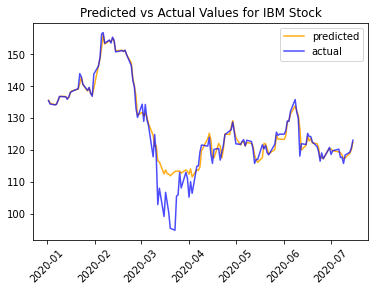

In [47]:
#Visualização dos Resultados
plt.plot(df_predictions,label='predicted', color='orange',alpha=0.9)
plt.plot(test_target, label='actual',color='blue',alpha=0.7)
plt.xticks(rotation=45)
plt.title("Predicted vs Actual Values for IBM Stock")
plt.legend()
plt.show()

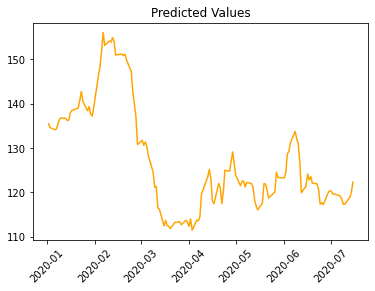

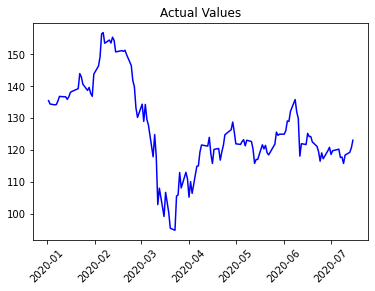

In [48]:
#Visualização sem Sobreposição
plt.plot(df_predictions, color='orange')
plt.xticks(rotation=45)
plt.title("Predicted Values")
plt.show()
plt.plot(test_target,color='blue')
plt.xticks(rotation=45)
plt.title("Actual Values")
plt.show()

# LSTM

E por fim te desafiamos a implementar uma arquitetura de redes neurais para séries temporais, a LSTM. Podem tomar como referência esse notebook, podem copiar o código, o intuito dessa etapa é que vocês tenham um contato com Deep Learning. (https://drive.google.com/file/d/1uagMXYRMJTdMJwoQbQD5LVfrYj4aUuSF/view?usp=sharing)

In [49]:
#Preparação do Dataset
symbol = 'AMZN'
data_source='yahoo'
start_date = '2015-01-01'
end_date = '2020-07-15'
df3 = data.DataReader(symbol, data_source, start_date, end_date)
training_set = df3[:'2019'].iloc[:,1:2].values
test_set = df3['2020':].iloc[:,1:2].values

In [50]:
#Importando Bibliotecas
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error

In [51]:
#Preparação para o Modelo - Training Set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [52]:
#Montando a Rede Neural LSTM
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
38/38 [==============================] - 2s 44ms/step - loss: 0.0327
Epoch 2/50
38/38 [==============================] - 2s 42ms/step - loss: 0.0144
Epoch 3/50
38/38 [==============================] - 2s 42ms/step - loss: 0.0095
Epoch 4/50
38/38 [==============================] - 2s 42ms/step - loss: 0.0089
Epoch 5/50
38/38 [==============================] - 2s 42ms/step - loss: 0.0089
Epoch 6/50
38/38 [==============================] - 2s 43ms/step - loss: 0.0076
Epoch 7/50
38/38 [==============================] - 2s 43ms/step - loss: 0.0074
Epoch 8/50
38/38 [==============================] - 2s 43ms/step - loss: 0.0062
Epoch 9/50
38/38 [==============================] - 2s 42ms/step - loss: 0.0063
Epoch 10/50
38/38 [==============================] - 2s 43ms/step - loss: 0.0054
Epoch 11/50
38/38 [==============================] - 2s 43ms/step - loss: 0.0055: 0s - loss: 0.00
Epoch 12/50
38/38 [==============================] - 2s 44ms/step - loss: 0.0057
Epoch 13/50
38/38 [=

In [53]:
#Preparando o Testing Set 
df3_total = pd.concat((df3["Close"][:'2019'],df3["High"]['2020':]),axis=0)
inputs = df3_total[len(df3)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
X_test = []
for i in range(60,196):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [54]:
#Predições
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

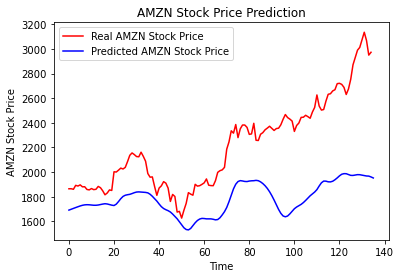

In [55]:
#Plotagem comparativa das predições
plt.plot(test_set, color='red',label='Real AMZN Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted AMZN Stock Price')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMZN Stock Price')
plt.legend()
plt.show()

Análise: a tendência geral da ação foi captada pela rede neural, mas oscilações menores e a magnitude das mudanças geradas pelas tendências ficaram realativamente distantes do valor real.

#  Referências
Links que usei como referências para esse notebook:

https://drive.google.com/file/d/1uagMXYRMJTdMJwoQbQD5LVfrYj4aUuSF/view
https://kelseyscottportfolio.weebly.com/uploads/6/1/7/4/61743097/researchpaper__1_.pdf
https://towardsdatascience.com/python-markowitz-optimization-b5e1623060f5
https://www.gazetadopovo.com.br/mundo/eua-abrem-vantagem-sobre-russia-no-mercado-global-de-armas-de-guerra/
https://infograficos.gazetadopovo.com.br/mundo/fabricantes-de-armas-de-guerra/
https://finance.yahoo.com/quote/LMT?p=LMT
http://companies.defenceindex.org/
https://www.itsuptous.org/blog/breaking-down-us-federal-budget-charts-and-graphs#:~:text=The%20federal%20budget%20for%20the,was%20set%20at%20%244.79%20trillion.
https://www.investopedia.com/articles/markets/102715/how-lockheed-martin-makes-its-money-lmt.asp
https://www.forbes.com/sites/greatspeculations/2020/12/31/how-much-of-lockheed-martins-revenues-comes-from-the-us-government/#236ff1f5629d
https://drive.google.com/file/d/1OY72FOGQSLcO2Jx1euykaQUkmc09Mv3c/view
